#                                     HW1 Jiahao Sun 7438675766

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_table("../data/vertebral_column_data/column_2c.dat",sep='\s+',header = None,engine='python')

In [4]:
df.columns = (['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle','sacral slope',\
               'pelvic radius','grade of spondylolisthesis','label'])
df

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


## b(i)

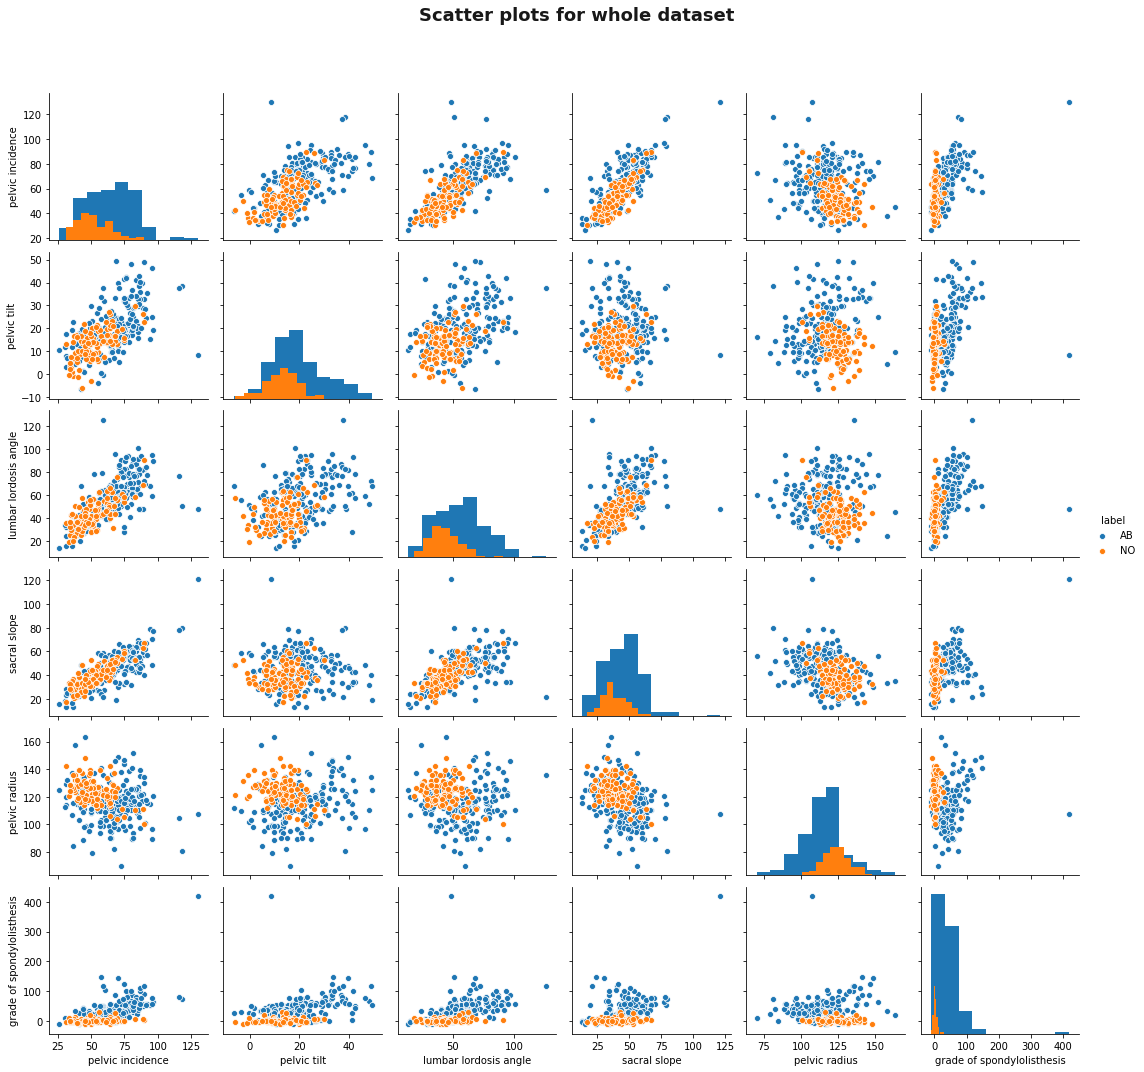

In [4]:
pairplot_fig_1 = sns.pairplot(df, hue= 'label',vars=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle','sacral slope',\
               'pelvic radius','grade of spondylolisthesis'],kind= 'scatter',diag_kind = 'hist')
plt.subplots_adjust(top=0.9)
pairplot_fig_1.fig.suptitle("Scatter plots for whole dataset", fontsize=18, alpha=0.9, weight='bold')
plt.show()

## b(ii)

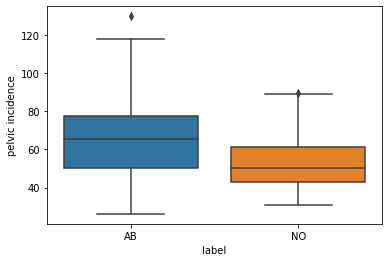

In [5]:
sns.boxplot(x='label', y='pelvic incidence',data=df, orient='v')

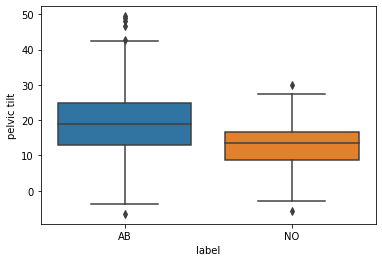

In [6]:
sns.boxplot(x ='label',y='pelvic tilt',data=df, orient='v')

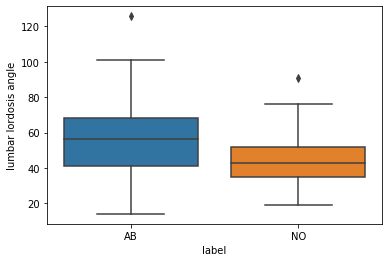

In [7]:
sns.boxplot(x ='label',y='lumbar lordosis angle',data=df, orient='v')

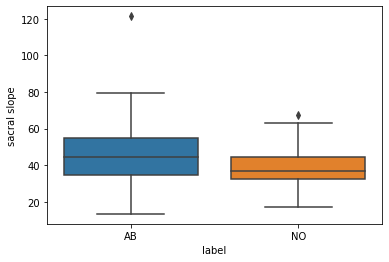

In [8]:
sns.boxplot(x ='label',y='sacral slope',data=df, orient='v')

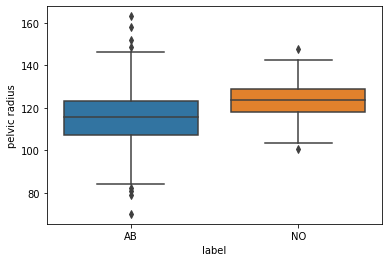

In [9]:
sns.boxplot(x ='label',y='pelvic radius',data=df, orient='v')

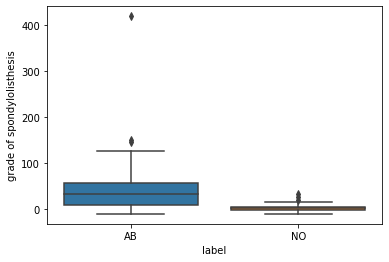

In [10]:
sns.boxplot(x ='label',y='grade of spondylolisthesis',data=df, orient='v')

## b(iii)

In [11]:
df['label_new'] = ""
df.loc[df['label'] == 'NO','label_new'] = 0
df.loc[df['label'] == 'AB','label_new'] = 1
df = df.drop(labels=['label'],axis=1)
df = df.rename(columns ={'label_new':'label'})

In [12]:
df

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


In [27]:
# #Min-Max Normalization
# df_array = df.values
# min_max_scaler = preprocessing.MinMaxScaler() 
# df_re = min_max_scaler.fit_transform(df_array)
# df = pd.DataFrame(df_re)

In [32]:
# df.columns = (['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle','sacral slope',\
#                'pelvic radius','grade of spondylolisthesis','label'])
# df[['label']]= df[['label']].astype(int)
# df

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,0.355710,0.519829,0.229193,0.250879,0.307452,0.025163,1
1,0.124518,0.296713,0.098622,0.144642,0.476718,0.036359,1
2,0.411651,0.513934,0.322982,0.307607,0.386171,0.017528,1
3,0.416184,0.557342,0.271255,0.289376,0.341865,0.051839,1
4,0.227238,0.289389,0.128155,0.246992,0.409614,0.044181,1
...,...,...,...,...,...,...,...
305,0.209780,0.360307,0.196886,0.193596,0.509410,0.015852,0
306,0.268036,0.487138,0.136209,0.183694,0.476288,0.024767,0
307,0.340471,0.522329,0.287900,0.234870,0.597806,0.019437,0
308,0.184221,0.272240,0.246823,0.214603,0.521239,0.026234,0


In [13]:
df_train_no = df[(df.label ==0)].reset_index(drop=True).iloc[:70,]
df_test_no = df[(df.label ==0)].reset_index(drop=True).iloc[70:,]

In [14]:
df_train_no

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
65,67.29,16.72,51.00,50.57,137.59,4.96,0
66,51.33,13.63,33.26,37.69,131.31,1.79,0
67,65.76,13.21,44.00,52.55,129.39,-1.98,0
68,40.41,-1.33,30.98,41.74,119.34,-6.17,0


In [15]:
df_train_ab = df[(df.label ==1)].reset_index(drop=True).iloc[:140,]
df_test_ab = df[(df.label ==1)].reset_index(drop=True).iloc[140:,]

In [16]:
df_train = pd.concat([df_train_no,df_train_ab])

In [17]:
df_train

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


In [18]:
df_test=pd.concat([df_test_no,df_test_ab])

In [19]:
df_test

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
70,50.09,13.43,34.46,36.66,119.13,3.09,0
71,64.26,14.50,43.90,49.76,115.39,5.95,0
72,53.68,13.45,41.58,40.24,113.91,2.74,0
73,49.00,13.11,51.87,35.88,126.40,0.54,0
74,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29,1
206,95.48,46.55,59.00,48.93,96.68,77.28,1
207,74.09,18.82,76.03,55.27,128.41,73.39,1
208,87.68,20.37,93.82,67.31,120.94,76.73,1


## c(i) & c(ii)

In [21]:
# neigh = KNeighborsClassifier(n_neighbors=3,p=2,metric = 'euclidean')
# x_train =df_train.iloc[: ,:6].values.tolist()
# y_train =df_train.iloc[: ,6:7].values.flatten().tolist()
# neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
# neigh.score(x_train,y_train)

0.8952380952380953

In [23]:
# x_test = df_test.iloc[: ,:6].values.tolist()
# y_test = df_test.iloc[: ,6:7].values.flatten().tolist()
# neigh.score(x_test,y_test)

0.92

In [24]:
# #double check with accuracy_score function
# x_test = df_test.iloc[: ,:6].values.tolist()
# y_test = df_test.iloc[: ,6:7].values.flatten().tolist()
# y_test_predict = neigh.predict(x_test)
# accuracy_score(y_test,y_test_predict)

0.92

In [25]:
# y_train_predict = neigh.predict(x_train)
# accuracy_score(y_train,y_train_predict)

0.8952380952380953

In [20]:
# loop K from 208 to 1
train_error=[]
test_error=[]
for k in range(208,0,-3):
    neigh = KNeighborsClassifier(n_neighbors=k,p=2,metric = 'euclidean')
    x_train =df_train.iloc[: ,:6].values.tolist()
    y_train =df_train.iloc[: ,6:7].values.flatten().tolist()
    neigh.fit(x_train, y_train)
    train_error.append(1-neigh.score(x_train,y_train))
    x_test = df_test.iloc[: ,:6].values.tolist()
    y_test = df_test.iloc[: ,6:7].values.flatten().tolist()
    test_error.append(1-neigh.score(x_test,y_test))

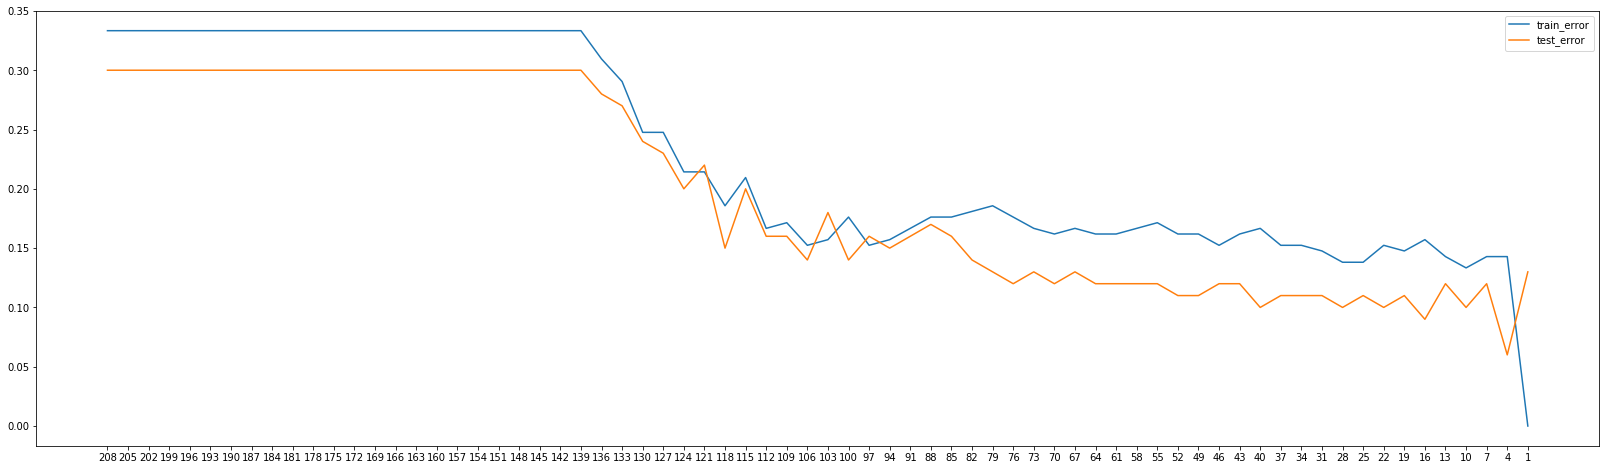

In [21]:
x=[i for i in range(208,0,-3)]
plt.figure(figsize=(28,8))
plt.plot(x,train_error,label='train_error')
plt.plot(x,test_error,label='test_error')
plt.gca().invert_xaxis()
plt.legend()
my_x_ticks = np.arange(208,0,-3)
plt.xticks(my_x_ticks)
plt.show()

The best K is 4.

In [22]:
#best K is 4
neigh4 = KNeighborsClassifier(n_neighbors=4,p=2,metric = 'euclidean')
x_train =df_train.iloc[: ,:6].values.tolist()
y_train =df_train.iloc[: ,6:7].values.flatten().tolist()
neigh4.fit(x_train, y_train)
x_test = df_test.iloc[: ,:6].values.tolist()
y_test = df_test.iloc[: ,6:7].values.flatten().tolist()
y_predict = neigh4.predict(x_test)
confusion_matrix(y_test,y_predict)

array([[25,  5],
       [ 1, 69]], dtype=int64)

In [23]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
(tn, fp, fn, tp)

(25, 5, 1, 69)

In [24]:
tp/(tp+fn)

0.9857142857142858

In [25]:
tn/(tn+fp)

0.8333333333333334

In [26]:
tp/(tp+fp)

0.9324324324324325

True positive rate = tp/(tp+fn) = 0.9857142857142858
True negative rate = tn/(tn+fp) = 0.8333333333333334
overall_precision = 0.94 
precision = tp/(tp+fp) = 0.9324324324324325
recall = tp/(tp+fn) = 0.9857142857142858
F-1 Score = 2*(precision*recall)/(precision+recall)= 0.9583333333333333

In [27]:
2*0.9324324324324325*0.9857142857142858/(0.9324324324324325+ 0.9857142857142858)

0.9583333333333333

## c(iii)

In [28]:
best_error=[]
for n in range(10,220,10):
    no = int(n/3)
    df_tr_no = df[(df.label ==0)].reset_index(drop=True).iloc[:no,]
    df_te_no = df[(df.label ==0)].reset_index(drop=True).iloc[no:,]
    df_tr_ab = df[(df.label ==1)].reset_index(drop=True).iloc[:(n-no),]
    df_te_ab = df[(df.label ==1)].reset_index(drop=True).iloc[(n-no):,]
    df_tr = pd.concat([df_tr_no,df_tr_ab])
    df_te= pd.concat([df_te_no,df_te_ab])
    best = 1
    for k in range(1,n,5):
        neigh = KNeighborsClassifier(n_neighbors=k,p=2,metric = 'euclidean')
        x_train =df_tr.iloc[: ,:6].values.tolist()
        y_train =df_tr.iloc[: ,6:7].values.flatten().tolist()
        neigh.fit(x_train, y_train)
        x_test = df_te.iloc[: ,:6].values.tolist()
        y_test = df_te.iloc[: ,6:7].values.flatten().tolist()
        best = min(1-neigh.score(x_test,y_test),best)
    best_error.append(best)

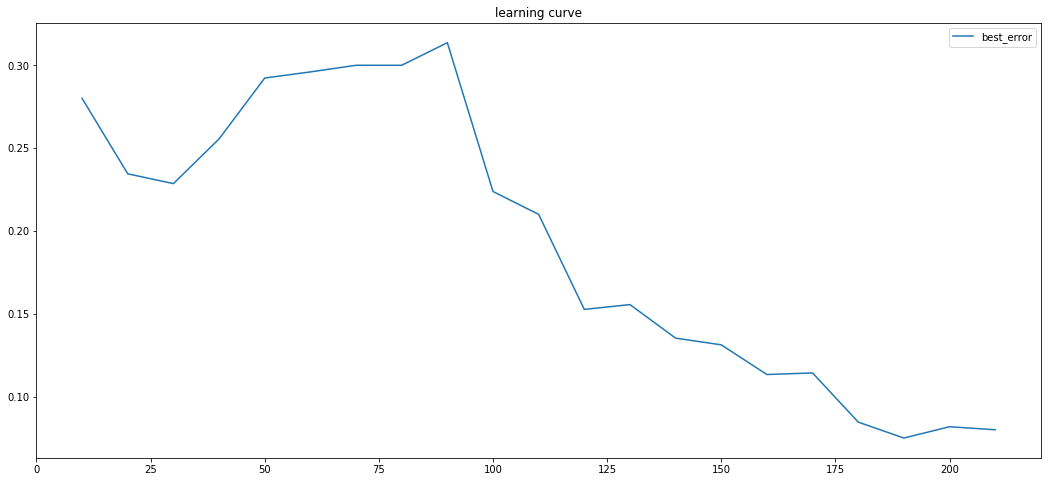

In [29]:
n=[i for i in range(10,220,10)]
plt.figure(figsize=(18,8))
plt.plot(n,best_error,label='best_error')
plt.legend()
plt.title('learning curve')
plt.show()

## d(i)A

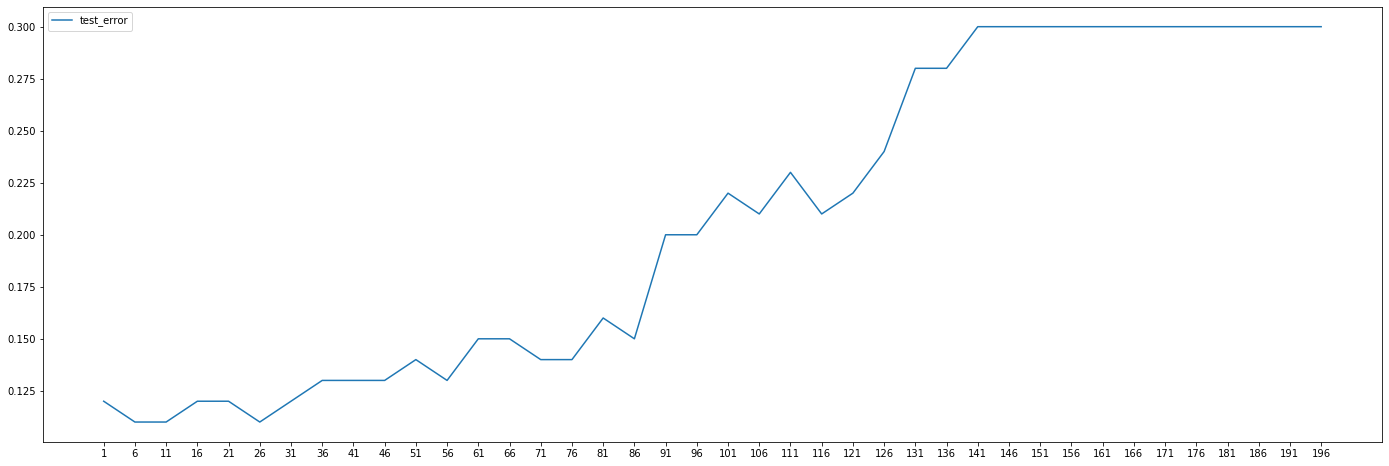

In [30]:
# loop K from 1 to 196
test_error=[]
for k in range(1,200,5):
    neigh = KNeighborsClassifier(n_neighbors=k,p=1,metric = 'minkowski')
    x_train =df_train.iloc[: ,:6].values.tolist()
    y_train =df_train.iloc[: ,6:7].values.flatten().tolist()
    neigh.fit(x_train, y_train)
    x_test = df_test.iloc[: ,:6].values.tolist()
    y_test = df_test.iloc[: ,6:7].values.flatten().tolist()
    test_error.append(1-neigh.score(x_test,y_test))

x=[i for i in range(1,200,5)]
plt.figure(figsize=(24,8))
plt.plot(x,test_error,label='test_error')
plt.legend()
my_x_ticks = np.arange(1,200,5)
plt.xticks(my_x_ticks)
plt.show()

In [31]:
min(test_error)

0.10999999999999999

The best k is 6,11,26. And the best test error rate is 0.1100.

## d(i)B

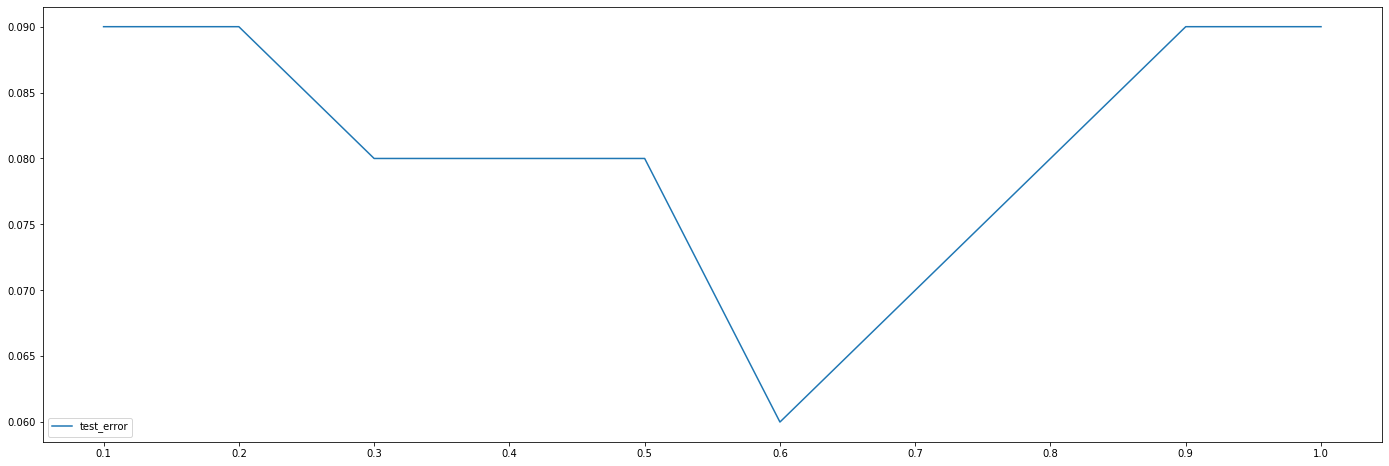

In [32]:
#Use the best k = 6 (k=6,11,26)
test_error=[]
for i in np.arange(0.1,1.1,0.1):
    p1 = pow(10,i)
    neigh = KNeighborsClassifier(n_neighbors=6,p=p1,metric = 'minkowski')
    x_train =df_train.iloc[: ,:6].values.tolist()
    y_train =df_train.iloc[: ,6:7].values.flatten().tolist()
    neigh.fit(x_train, y_train)
    x_test = df_test.iloc[: ,:6].values.tolist()
    y_test = df_test.iloc[: ,6:7].values.flatten().tolist()
    test_error.append(1-neigh.score(x_test,y_test))

p = [i for i in np.arange(0.1,1.1,0.1)]
plt.figure(figsize=(24,8))
plt.plot(p,test_error,label='test_error')
plt.legend()
my_x_ticks = np.arange(0.1,1.1,0.1)
plt.xticks(my_x_ticks)
plt.show()

In [33]:
min(test_error)

0.06000000000000005

The best log10(p) is 0.6 and the best test error rate is 0.0600

## d(i)C

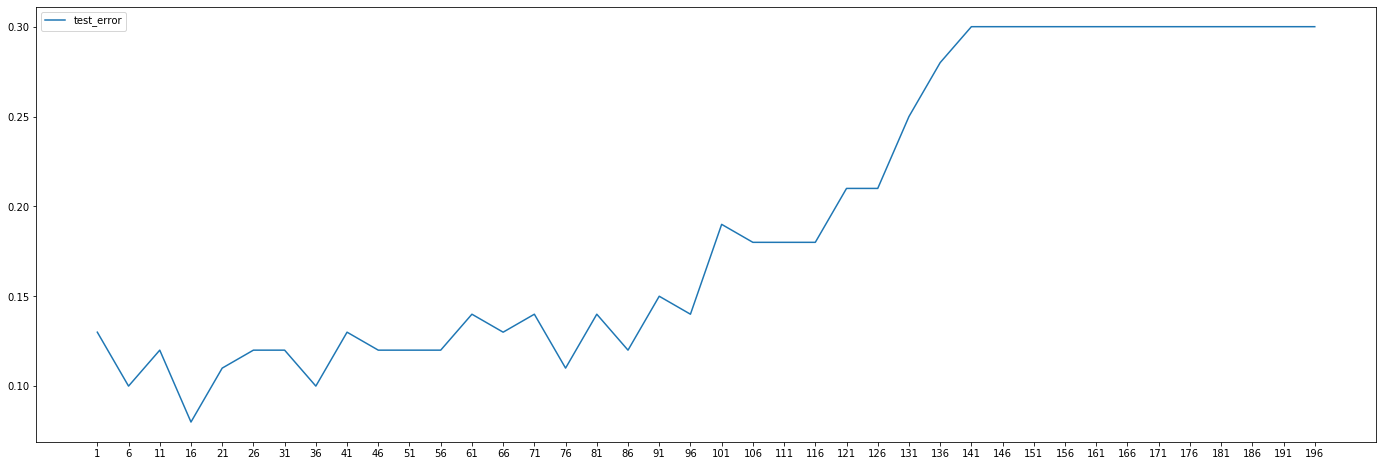

In [34]:
# loop K from 1 to 196
test_error=[]
for k in range(1,200,5):
    neigh = KNeighborsClassifier(n_neighbors=k,p= float('inf'),metric = 'minkowski')
    x_train =df_train.iloc[: ,:6].values.tolist()
    y_train =df_train.iloc[: ,6:7].values.flatten().tolist()
    neigh.fit(x_train, y_train)
    x_test = df_test.iloc[: ,:6].values.tolist()
    y_test = df_test.iloc[: ,6:7].values.flatten().tolist()
    test_error.append(1-neigh.score(x_test,y_test))

x=[i for i in range(1,200,5)]
plt.figure(figsize=(24,8))
plt.plot(x,test_error,label='test_error')
plt.legend()
my_x_ticks = np.arange(1,200,5)
plt.xticks(my_x_ticks)
plt.show()

In [35]:
min(test_error)

0.07999999999999996

The best k is 16 and the best test error rate is 0.0800

## d(ii)

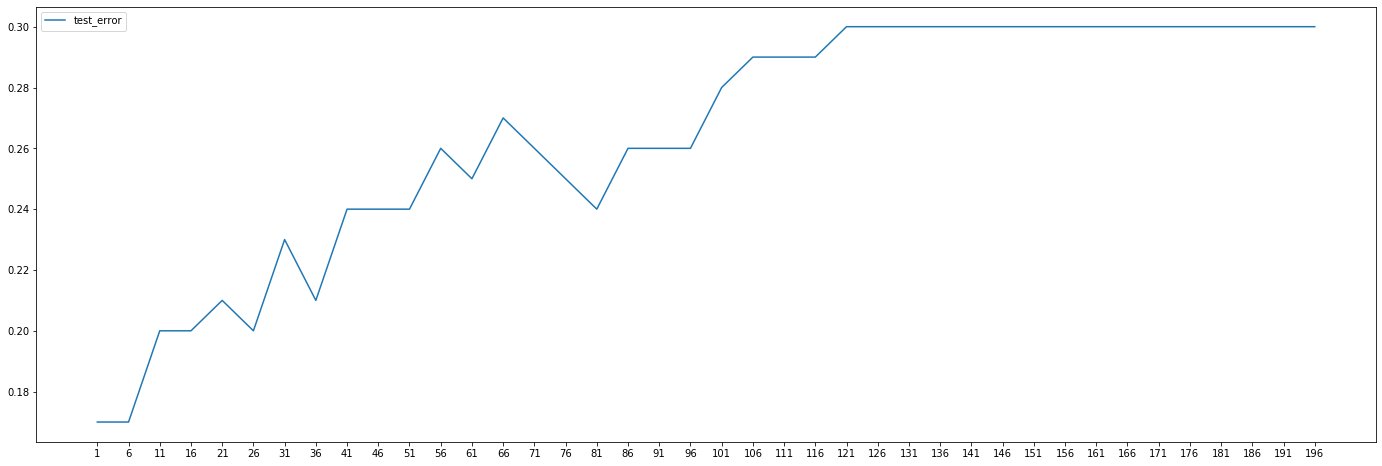

In [36]:
# loop K from 1 to 196
test_error=[]
for k in range(1,200,5):
    x_train =df_train.iloc[: ,:6].values.tolist()
    y_train =df_train.iloc[: ,6:7].values.flatten().tolist() 
    neigh = KNeighborsClassifier(n_neighbors=k,metric_params={'V': np.cov(x_train,rowvar=False)},metric = 'mahalanobis')
    neigh.fit(x_train, y_train)
    x_test = df_test.iloc[: ,:6].values.tolist()
    y_test = df_test.iloc[: ,6:7].values.flatten().tolist()
    test_error.append(1-neigh.score(x_test,y_test))

x=[i for i in range(1,200,5)]
plt.figure(figsize=(24,8))
plt.plot(x,test_error,label='test_error')
plt.legend()
my_x_ticks = np.arange(1,200,5)
plt.xticks(my_x_ticks)
plt.show()

In [37]:
min(test_error)

0.17000000000000004

The best k is 1 or 6 and the best error rate is 0.1700

In [38]:
result_table = pd.DataFrame({'Metric': ['Manhattan Distance', 'Minkowski Disttance', 'Chebyshev Distance', 'Mahalanobis Distance'],\
                            'Params': ['p = 1', 'p∈{0.1, 0.2,…1}, k = 6', 'p --> ∞', 'V'],\
                            'Best Result': ['k = 6, 11, 26', 'log10(p) = 0.6', 'k = 16', 'k = 1,6'],\
                            'Best Test Error':[0.1100, 0.0600, 0.0800, 0.1700]})
result_table

,Metric,Params,Best Result,Best Test Error
0,Manhattan Distance,p = 1,"k = 6, 11, 26",0.11
1,Minkowski Disttance,"p∈{0.1, 0.2,…1}, k = 6",log10(p) = 0.6,0.06
2,Chebyshev Distance,p --> ∞,k = 16,0.08
3,Mahalanobis Distance,V,"k = 1,6",0.17


## e

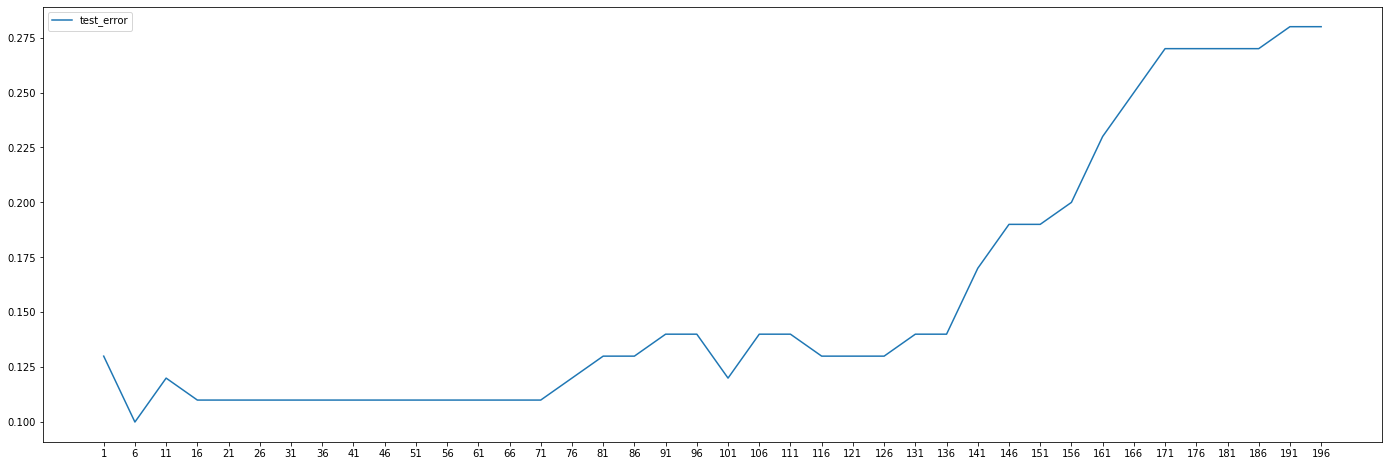

In [39]:
# loop K from 1 to 196
test_error=[]
for k in range(1,200,5):
    x_train =df_train.iloc[: ,:6].values.tolist()
    y_train =df_train.iloc[: ,6:7].values.flatten().tolist() 
    neigh = KNeighborsClassifier(n_neighbors=k,p=2,metric = 'euclidean',weights='distance')
    neigh.fit(x_train, y_train)
    x_test = df_test.iloc[: ,:6].values.tolist()
    y_test = df_test.iloc[: ,6:7].values.flatten().tolist()
    test_error.append(1-neigh.score(x_test,y_test))

x=[i for i in range(1,200,5)]
plt.figure(figsize=(24,8))
plt.plot(x,test_error,label='test_error')
plt.legend()
my_x_ticks = np.arange(1,200,5)
plt.xticks(my_x_ticks)
plt.show()

In [40]:
min(test_error)

0.09999999999999998

The best k is 6 and best test error rate is 0.099

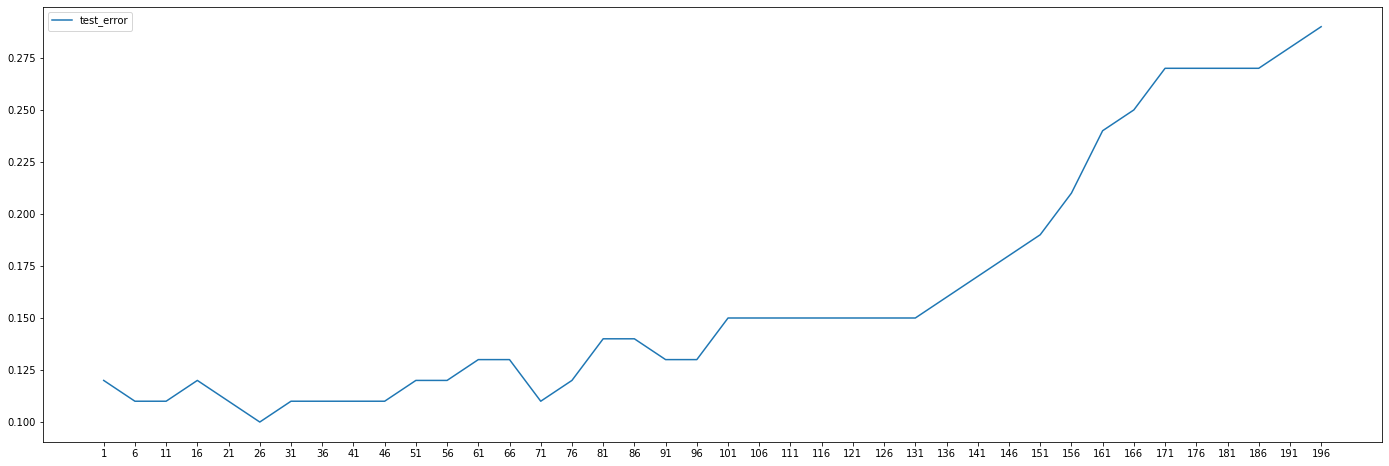

In [41]:
# loop K from 1 to 196
test_error=[]
for k in range(1,200,5):
    x_train =df_train.iloc[: ,:6].values.tolist()
    y_train =df_train.iloc[: ,6:7].values.flatten().tolist() 
    neigh = KNeighborsClassifier(n_neighbors=k,p=1,metric = 'minkowski',weights='distance')
    neigh.fit(x_train, y_train)
    x_test = df_test.iloc[: ,:6].values.tolist()
    y_test = df_test.iloc[: ,6:7].values.flatten().tolist()
    test_error.append(1-neigh.score(x_test,y_test))

x=[i for i in range(1,200,5)]
plt.figure(figsize=(24,8))
plt.plot(x,test_error,label='test_error')
plt.legend()
my_x_ticks = np.arange(1,200,5)
plt.xticks(my_x_ticks)
plt.show()

In [42]:
min(test_error)

0.09999999999999998

The best K is 26 and the best error rate is 0.09999

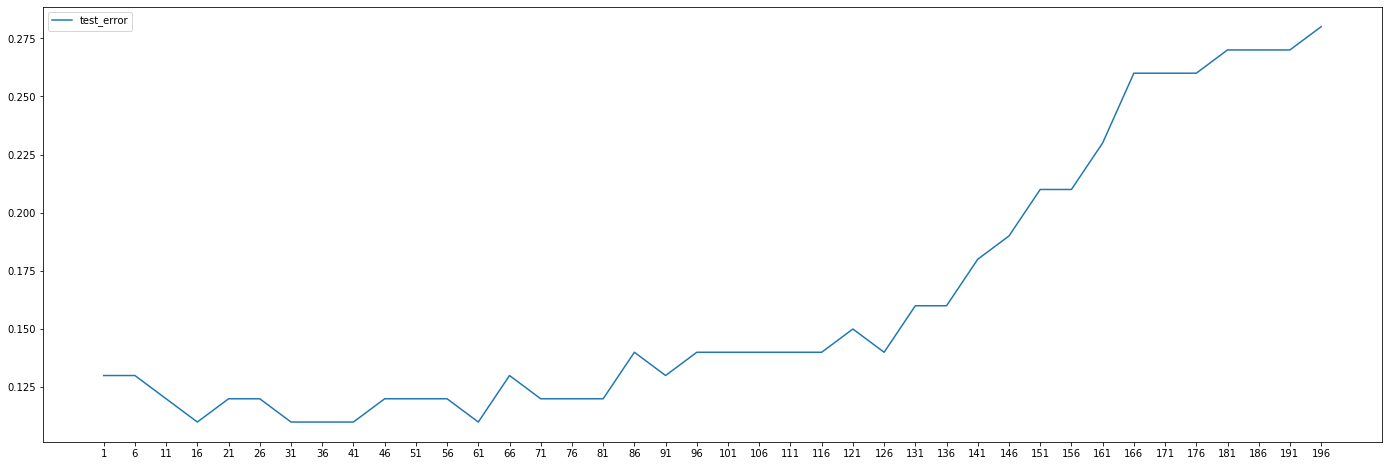

In [43]:
# loop K from 1 to 196
test_error=[]
for k in range(1,200,5):
    x_train =df_train.iloc[: ,:6].values.tolist()
    y_train =df_train.iloc[: ,6:7].values.flatten().tolist() 
    neigh = KNeighborsClassifier(n_neighbors=k,p=float('inf'),metric = 'minkowski',weights='distance')
    neigh.fit(x_train, y_train)
    x_test = df_test.iloc[: ,:6].values.tolist()
    y_test = df_test.iloc[: ,6:7].values.flatten().tolist()
    test_error.append(1-neigh.score(x_test,y_test))

x=[i for i in range(1,200,5)]
plt.figure(figsize=(24,8))
plt.plot(x,test_error,label='test_error')
plt.legend()
my_x_ticks = np.arange(1,200,5)
plt.xticks(my_x_ticks)
plt.show()

In [44]:
min(test_error)

0.10999999999999999

In [45]:
test_error

[0.13,
 0.13,
 0.12,
 0.10999999999999999,
 0.12,
 0.12,
 0.10999999999999999,
 0.10999999999999999,
 0.10999999999999999,
 0.12,
 0.12,
 0.12,
 0.10999999999999999,
 0.13,
 0.12,
 0.12,
 0.12,
 0.14,
 0.13,
 0.14,
 0.14,
 0.14,
 0.14,
 0.14,
 0.15000000000000002,
 0.14,
 0.16000000000000003,
 0.16000000000000003,
 0.18000000000000005,
 0.18999999999999995,
 0.20999999999999996,
 0.20999999999999996,
 0.22999999999999998,
 0.26,
 0.26,
 0.26,
 0.27,
 0.27,
 0.27,
 0.28]

In [46]:
tableshow = pd.DataFrame({'k':x,'test_error':test_error})
tableshow

,k,test_error
0,1,0.13
1,6,0.13
2,11,0.12
3,16,0.11
4,21,0.12
5,26,0.12
6,31,0.11
7,36,0.11
8,41,0.11
9,46,0.12


The best k is 16,31,36,41,61 and the best error rate is 0.109999

In [47]:
result_table_e = pd.DataFrame({'Metric': ['Euclidiean Distance', 'Manhattan Distance', 'Chebyshev Distance'],\
                            'Best k': ['6', '26', '16, 31, 36, 41, 61'], 'Best error rate':[0.099999,0.099999,0.109999]})
result_table_e

,Metric,Best k,Best error rate
0,Euclidiean Distance,6,0.099999
1,Manhattan Distance,26,0.099999
2,Chebyshev Distance,"16, 31, 36, 41, 61",0.109999


## f

The lowest training rate in my homework is 0.